# Principal Component Analysis (PCA)
### Author: Beixian Gu

## Table of content
- Introduction
- Algorithm
- Mathematical Description
- Application on Dataset


## Introduction 

Principal Component Analysis (PCA) is a widely used unsupervised machine learning technique for data analysis and dimensionality reduction. It is a powerful tool for understanding the underlying structure of complex data sets by identifying the most important features or patterns.

PCA works by finding the directions (or principal components) that explain the maximum amount of variance in the data. These principal components are orthogonal to each other and provide a new coordinate system for the data. By projecting the original data onto these principal components, we can reduce the dimensionality of the data while retaining most of the important information.

## Algorithm Steps

The PCA algorithm can be summarized in the following steps:

1. Standardize the data: Subtract the mean and divide by the standard deviation of each feature.
2. Calculate the covariance matrix: Compute the covariance matrix of the standardized data.
3. Calculate the eigenvectors and eigenvalues of the covariance matrix: Eigenvectors are the principal components, and eigenvalues represent the amount of variance explained by each principal component.
4. Sort the eigenvectors by their corresponding eigenvalues in descending order.
5. Select the top k eigenvectors: Choose the top k eigenvectors that explain the most variance in the data.
6. Project the data onto the new coordinate system: Multiply the standardized data by the selected eigenvectors to obtain the new lower-dimensional representation.




## Mathematical Description
Consider an $n \times p$ data matrix $X$, with column-wise zero , where each of the rows represents a different repetition of the experiment, and each of the columns gives a particular kind of feature .

The $k$-th component can be found by subtracting the first $k$ principal components from $X$:

$$\mathbf{\hat{X}}_k = \mathbf{X} - \sum_{s = 1}^{k - 1} \mathbf{X} \mathbf{w}_{(s)} \mathbf{w}_{(s)}^{\mathsf{T}}$$

and then finding the weight vector which extracts the maximum variance from this new data matrix
$$\mathbf{w}_{(k)}
= \mathop{\operatorname{arg\,max}}_{\left\| \mathbf{w} \right\| = 1} \left\{ \left\| \mathbf{\hat{X}}_{k} \mathbf{w} \right\|^2 \right\}
= \arg\max \left\{ \tfrac{\mathbf{w}^\mathsf{T} \mathbf{\hat{X}}_{k}^\mathsf{T} \mathbf{\hat{X}}_{k} \mathbf{w}}{\mathbf{w}^T \mathbf{w}} \right\}$$

And the full principal components decomposition of $X$ is given by
$$
\mathbf{T} = \mathbf{X}\mathbf{W}
$$

## Application on Fish dataset

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the fish.csv dataset
df = pd.read_csv("fish.csv")

# Separate the target variable from the feature variables
y = df["Species"]
X = df.drop("Species", axis=1)

In [8]:
# Standardize the feature variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA to the standardized data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a new dataframe with the principal components and the target variable
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Species"] = y



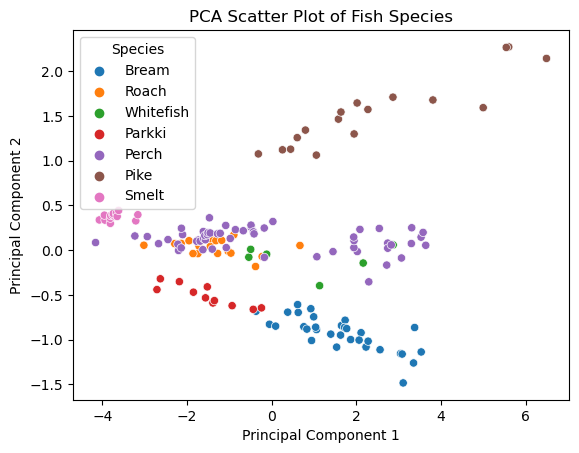

Explained Variance Ratio:
[0.87830089 0.08508548]


In [9]:
# Visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Species")
plt.title("PCA Scatter Plot of Fish Species")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Print the explained variance ratio of each principal component
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
